In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df.drop(['day', 'month', 'year'], axis=1, inplace= True)

In [6]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [8]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [9]:
X = df.drop('FWI', axis=1)
y = df['FWI']

In [10]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [11]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [12]:
## Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

<Axes: >

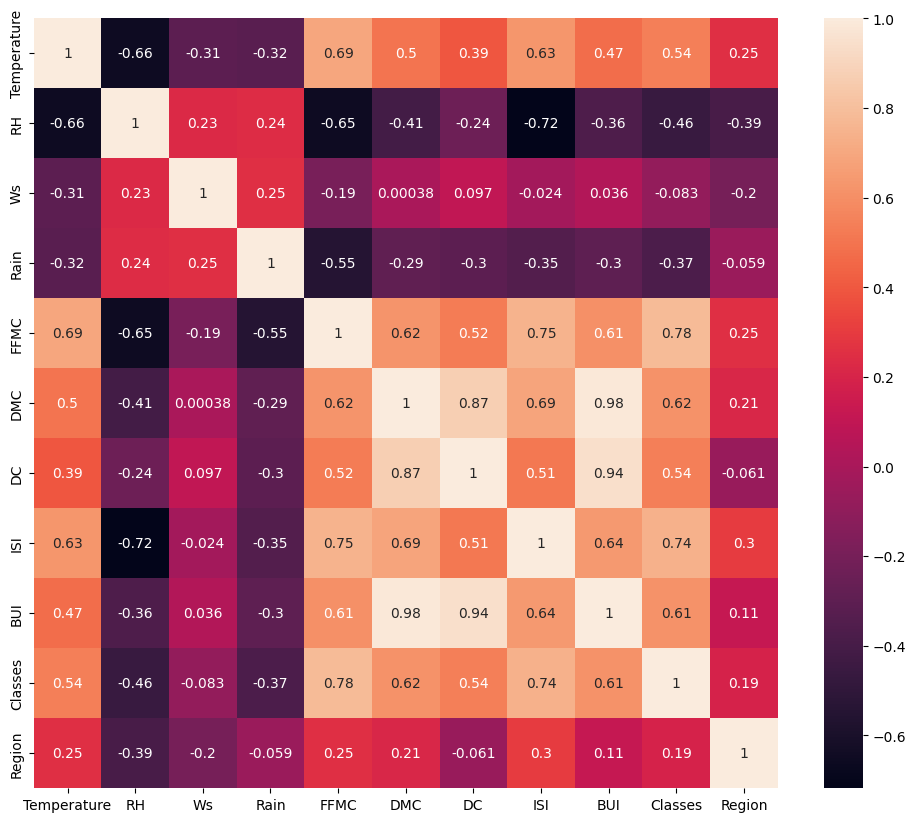

In [14]:
plt.figure(figsize=(12, 10))
corr= X_train.corr()
sns.heatmap(corr, annot=True)

In [15]:
def correlation(dataset, threshold) :
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)) :
        for j in range(i) :
            if(abs(corr_matrix.iloc[i, j])> threshold) :
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr
                

In [16]:
corr_features = correlation(X_train, .85)

In [17]:
## drop features when correlation ids more tha 85%
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)

In [18]:
X_train.shape, X_test.shape

((182, 9), (61, 9))

Feature scaling and standardisation

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [20]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

In [21]:
## box plots to understand effects of standard scalar

Text(0.5, 1.0, 'X_train before scaling')

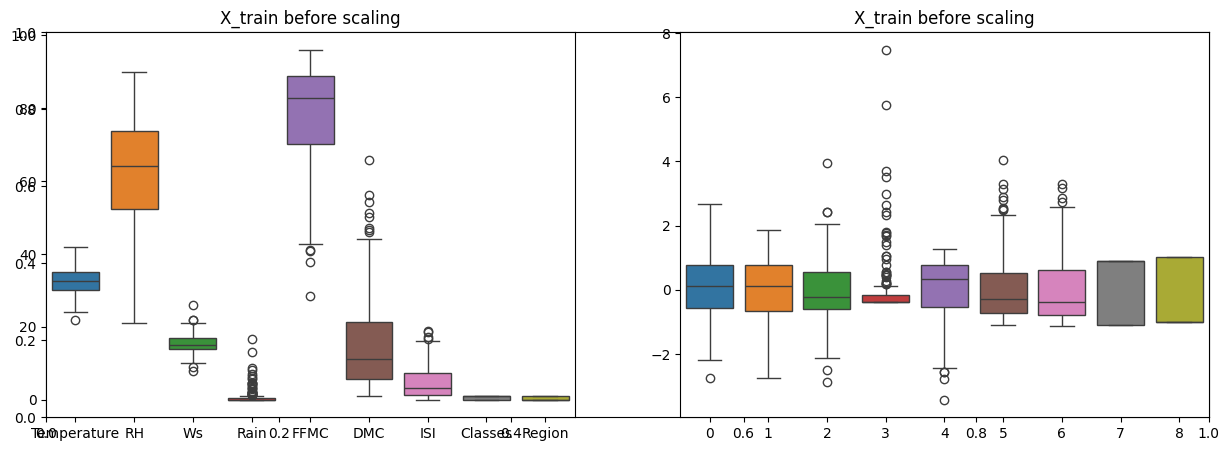

In [22]:
plt.subplots(figsize=(15, 5))
plt.subplot(1,2, 1)
sns.boxplot(data=X_train)
plt.title('X_train before scaling')
plt.subplot(1,2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train before scaling')

In [27]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [24]:
lassocv.predict(X_test_scaled)

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

Mean abosolute error : 0.619970115826343
R2 Score  : 0.9820946715928275


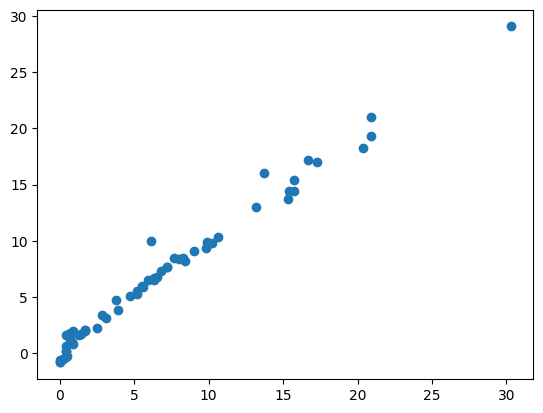

In [28]:
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print('Mean abosolute error :', mae)
print('R2 Score  :', score)

**Linear Regression model**


Mean abosolute error : 0.5468236465249978
R2 Score  : 0.9847657384266951


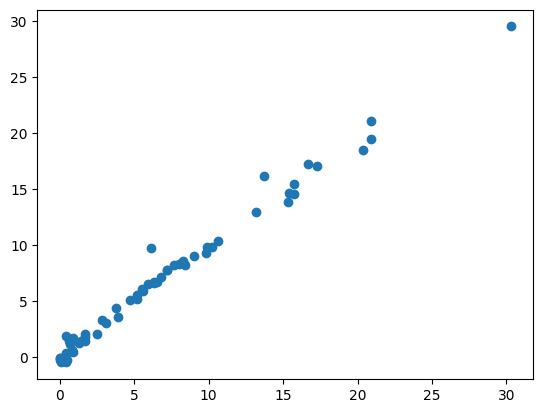

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lineReg = LinearRegression()

lineReg.fit(X_train_scaled, y_train)
y_pred = lineReg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print('Mean abosolute error :', mae)
print('R2 Score  :', score)

plt.scatter(y_test, y_pred)

Lasso regression


Mean abosolute error : 1.133175994914409
R2 Score  : 0.9492020263112388


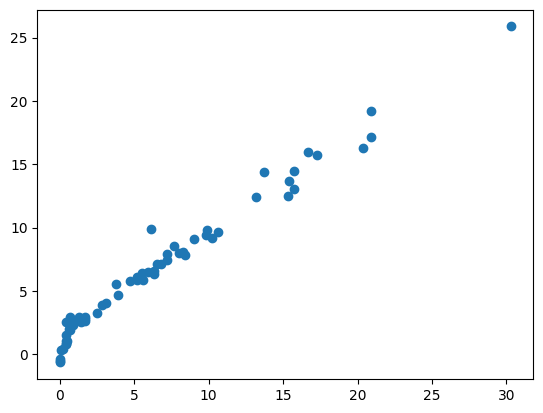

In [77]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()

lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print('Mean abosolute error :', mae)
print('R2 Score  :', score)

plt.scatter(y_test, y_pred)

Ridge Regression model

Mean abosolute error : 0.5642305340105715
R2 Score  : 0.9842993364555512


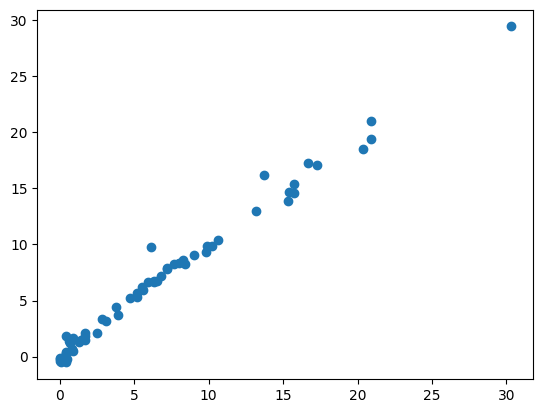

In [36]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()

ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print('Mean abosolute error :', mae)
print('R2 Score  :', score)

plt.scatter(y_test, y_pred)

Mean abosolute error : 0.5642305340105715
R2 Score  : 0.9842993364555512


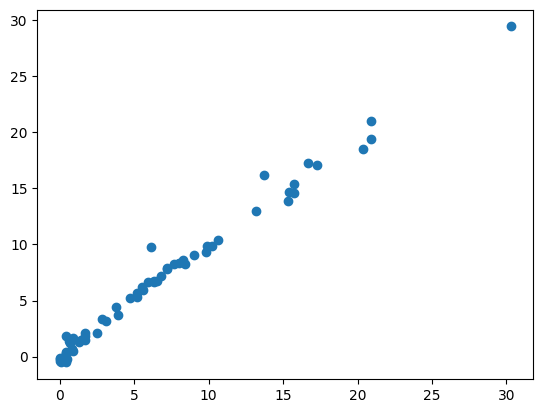

In [32]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv= 5)
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print('Mean abosolute error :', mae)
print('R2 Score  :', score)

plt.scatter(y_test, y_pred)

In [33]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

Elasticnet Regression

Mean abosolute error : 1.8822353634896005
R2 Score  : 0.8753460589519703


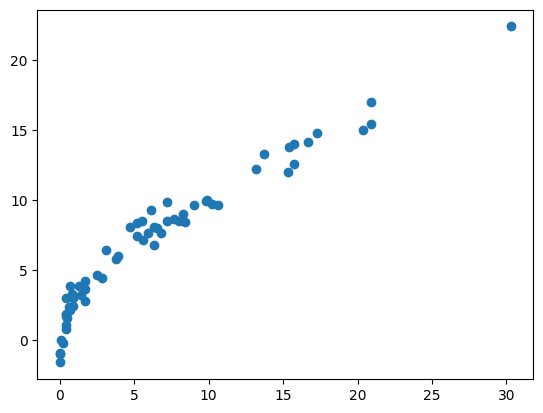

In [79]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
eleasticNet = ElasticNet()

eleasticNet.fit(X_train_scaled, y_train)
y_pred = eleasticNet.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print('Mean abosolute error :', mae)
print('R2 Score  :', score)

plt.scatter(y_test, y_pred)

Mean abosolute error : 0.6575946731430898
R2 Score  : 0.9814217587854941


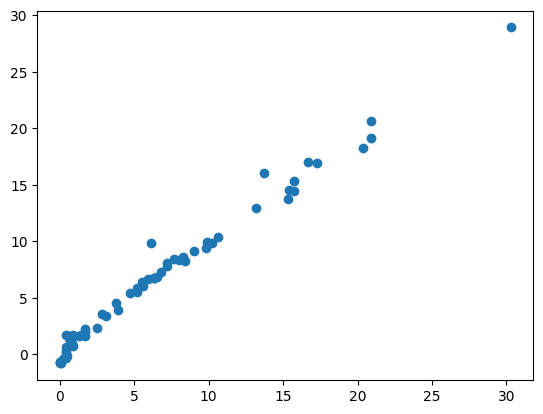

In [85]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv = ElasticNetCV(cv= 5)
elasticnetcv.fit(X_train_scaled, y_train)
y_pred = elasticnetcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print('Mean abosolute error :', mae)
print('R2 Score  :', score)

plt.scatter(y_test, y_pred)

In [ ]:
##pickle the machine learning models preprocessing model standardscalar

In [34]:
scalar

StandardScaler()

In [37]:
ridge

Ridge()

In [38]:
import pickle
pickle.dump(scalar, open('scalar.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))